Found 68 images belonging to 2 classes.
Found 1832 images belonging to 2 classes.


C:\Users\kotam\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7406 - loss: 0.6406 - val_accuracy: 0.8177 - val_loss: 0.6078
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6520 - loss: 0.6829 - val_accuracy: 0.5726 - val_loss: 0.6153
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6910 - loss: 0.5823 - val_accuracy: 0.5071 - val_loss: 0.6786
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.7725 - loss: 0.4613 - val_accuracy: 0.5066 - val_loss: 0.7468
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.7842 - loss: 0.3732 - val_accuracy: 0.5066 - val_loss: 0.7790
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.8679 - loss: 0.3533 - val_accuracy: 0.5066 - val_loss: 0.7563
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.9277 - loss: 0.2097 - val_accuracy: 0.5066 - val_loss: 0.8783
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.9017 - loss: 0.2562 - val_accuracy: 0.5066 - val_loss: 0.9464
Epoch 9/10
3/3 ━

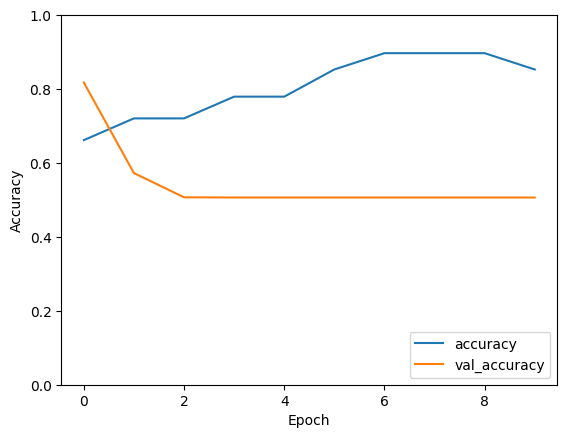

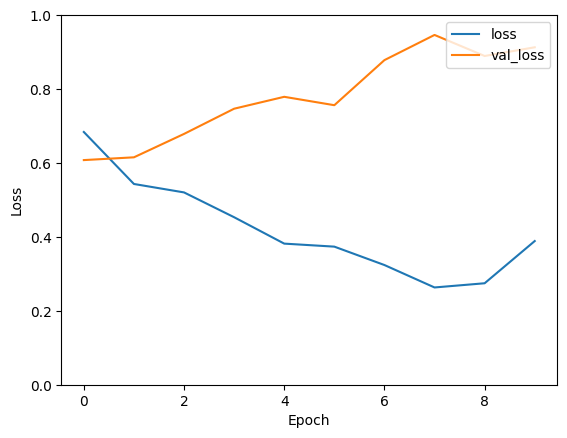

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Directories for training and validation data
train_dir = "image_training_data/testing"
val_dir = "image_training_data/training_and_validation"

# Image data generators with data augmentation for training and rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Build a more complex CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('cnn_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

# Save the model
model.save('transfer_learned_model_2.h5')
